# Introducción a la Ciencia de los Datos, CIDE 
## (Profesor Gonzalo Castañeda)

## P13. Arboles de decisión con Python
### Müller Andreas C. & Sarah Guido. 2016. Machine Learning with Python, O’Reilly Media 
### Chap. 2. Supervised Learning, Section Decision Trees. 


## (1) Árboles de desición en la librería sklearn

In [1]:
# Veamos un ejemplo con la base de datos de cáncer de pulmón disponible en sklearn

In [1]:
from sklearn.tree import DecisionTreeClassifier       # Importamos el modulo para clasificar
from sklearn.datasets import load_breast_cancer       # Importamos la base de datos
from sklearn.model_selection import train_test_split  # Importamos el módulo de división de datos

cancer = load_breast_cancer()                       # Descargamos la base de datos
# Al igual que en otros algoritmos de ML dividimos los datos para aprendizaje y para prueba
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)   # Estratificados
tree = DecisionTreeClassifier(random_state=0)       # Establecemos el algortimo de árbol
# El proceso aleatorio tienen que ver con voto mayoritario en caso de empate
tree.fit(X_train, y_train)                          # Realizamos pronóstico con aprendizaje
# Calculamos la exactitud del pronóstico con conjunto de aprendizaje y prueba
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
# Como es de esperarce la exactitud con el conjunto de aprendizaje es del 100%. Se debe a que los
# nodos terminales son puros ya que el algorito implemento todas las etapas posibles
# Recordar que esto puede dar lugar a problemas de overfitting; auque se observa que el modelo 
# trabaja relativamente bien con las instancias del conjunto de prueba 

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [3]:
# ¿Qué pasaría si restringimos la profundidad a 4 etapas?

In [2]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)   # Especificamos la profundidad
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
# Notar que baja la exactitud en el conjunto de aprendizaje, pero aumenta en el conjunto de
# prueba, por lo que puede concluirse que el podar el árbol fue un ejercicio adecuado

Accuracy on training set: 0.988
Accuracy on test set: 0.951


## (2) Análisis visual de los árboles de decisión

In [3]:
# Existen dos clases de cáncer: maligno y benigno
from sklearn.tree import export_graphviz     # importamos el módulo de graficación
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)  
# Impurity = métrica de información (e.g., Gini)

In [23]:
# Tienen que instalar la siguiente libreria en jupyter
# tarda un tiempo en ejecutarse
!pip install graphviz

In [15]:
# Imprimimos la gráfica
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Una árbol como el siguiente se va a producir 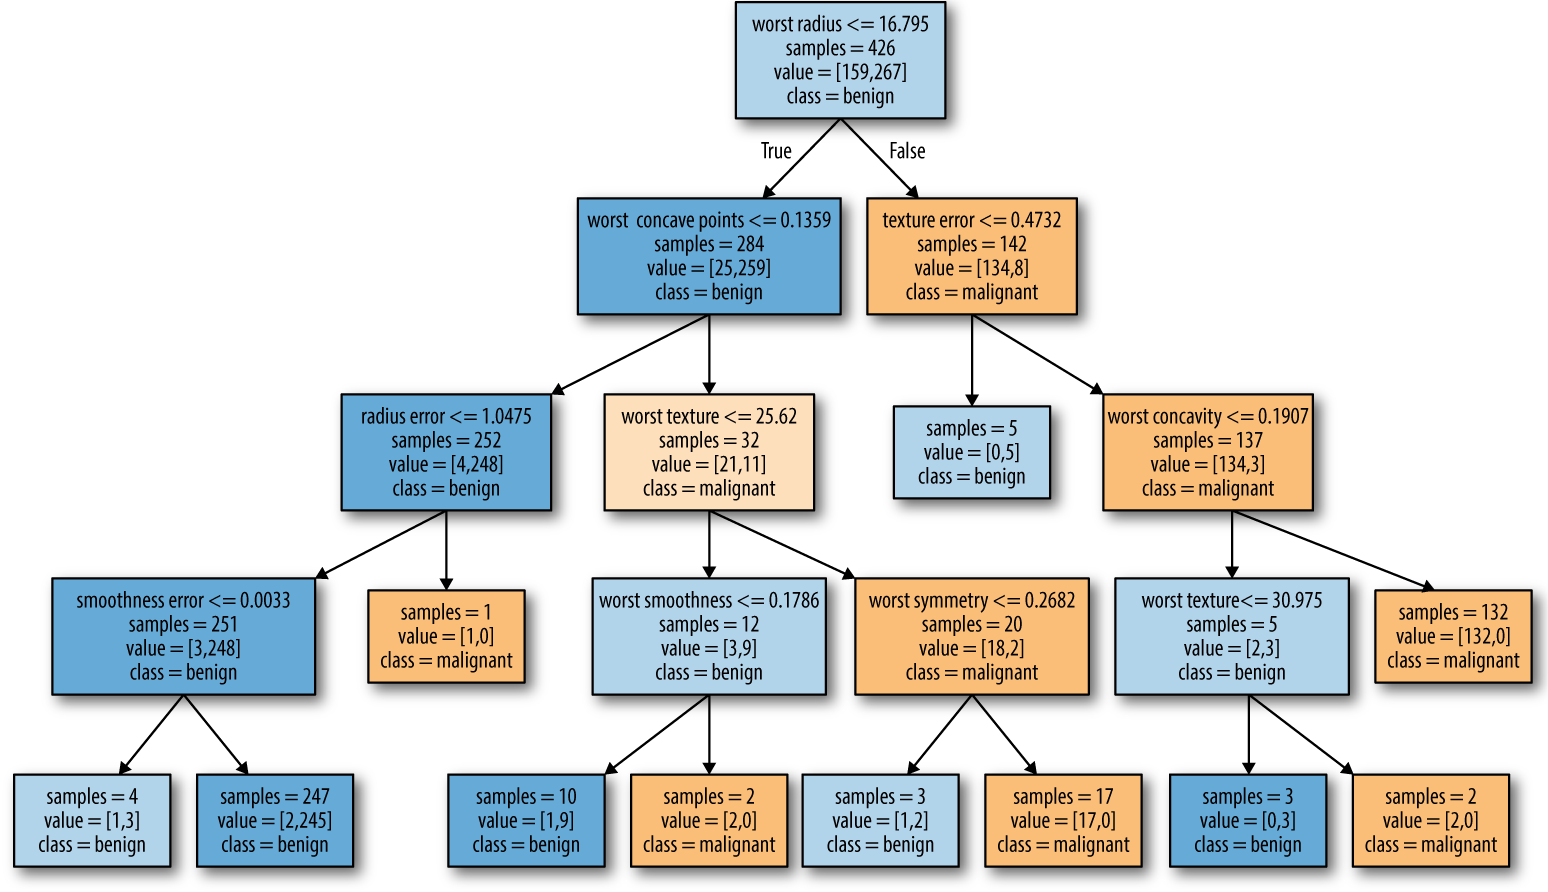

In [9]:
# El árbol tiene cuatro etapas de decisión
# Los atributos involucrados en la división de subespacios se presentan
# en la primera línea
# Notar que en una misma etapa se pueden usar distintos atributos para hacer la división
# Sample: número de instancias que se ubican en cada nodo
# Value: lista con etiquetas de clasificación. Primer argumento  corresponde a maligno,
# segundo argumento corresponde a benigno
# Class: determina etiqueta en función de voto mayoritario en tres nodos hoja, mientras que
# en los otros 4 nodos terminales se trata de hojas puras  

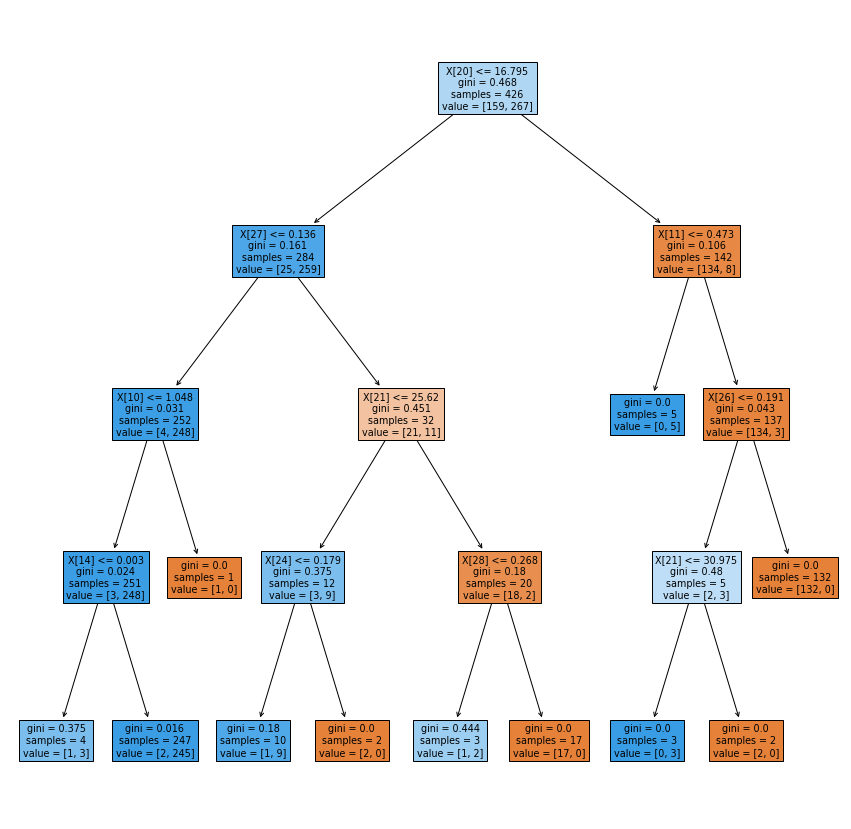

In [6]:
# Un método más sencillo usando un módulo de sklearn que se llama plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(tree, filled=True)
plt.show()

## (3) Importancia relativa de los atributos en los árboles

In [11]:
# Una forma de interpretar los resultados del árbol es calculando la importancia de los atributos
# para la toma de decisiones jerárquica.
# El indicador de importancia oscila en el rango [0, 1] en donde 0 significa que el atributo no 
# es utilizado en ningún sentido para la configuración del árbol

In [7]:
# En el ejemplo del cáncer de pulmón con un árbol de profundidad 4
# se utiliza el método: tree.feature_importances_
print("Feature importances:\n{}".format(tree.feature_importances_))
# Notar que la mayoría de los atributos no tienen peso alguno en el árbol de decisión

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


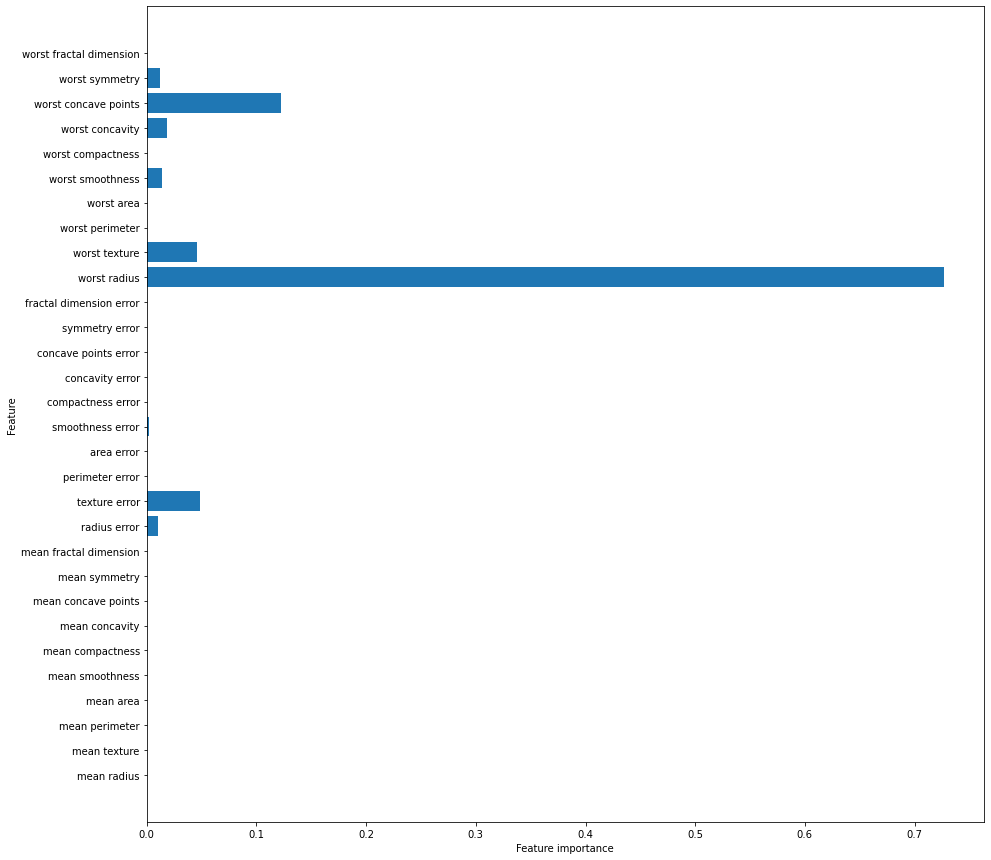

In [8]:
# Podemos hacer un diagrama de barras para identificar los nombres de los atributos
# Escribimos una función
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(15,15))
    n_features = cancer.data.shape[1]               # Número de atributos
    plt.barh(range(n_features), model.feature_importances_, align='center')   # diagrama de barra
    plt.yticks(np.arange(n_features), cancer.feature_names)     # Etiquetas
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
# Invocamos la función de graficación
plot_feature_importances_cancer(tree)    # en tree  tenemos el arbol (checar celda más árriba)
# Notar que el atributo 'worst radius' que se usa en la primera división es el más relevante
# lo que es consistente con que en la primera división las clases se separan relativamente bien
# Habría que advertir que si un atributo muestra poca importancia, no significa que sea
# irrelevante, más bien que su información es capturada por otros atributos
# Este resultado no implica que el tamaño del radio debe estar asociado a una clase en particula
# ya que pueden existir relaciones no-lineales

Crees que tus resultados son consistentes con el resultado de importancia relativa de los atributos obtenido en el caso en que se usan los cuatro atributos para el análisis.## Por ejemplo, el siguiente árbol de decisión  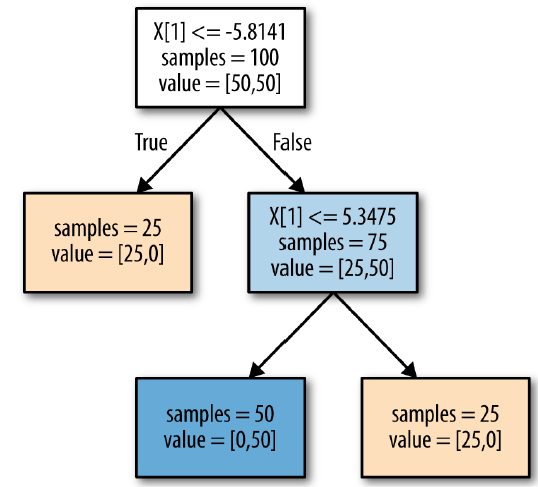

## proviene del siguiente diagrama, en el que el atributo del eje horizontal presenta una relación no monotónica (clase azul tiene un nivel bajo pero tambien alto de este atributo) 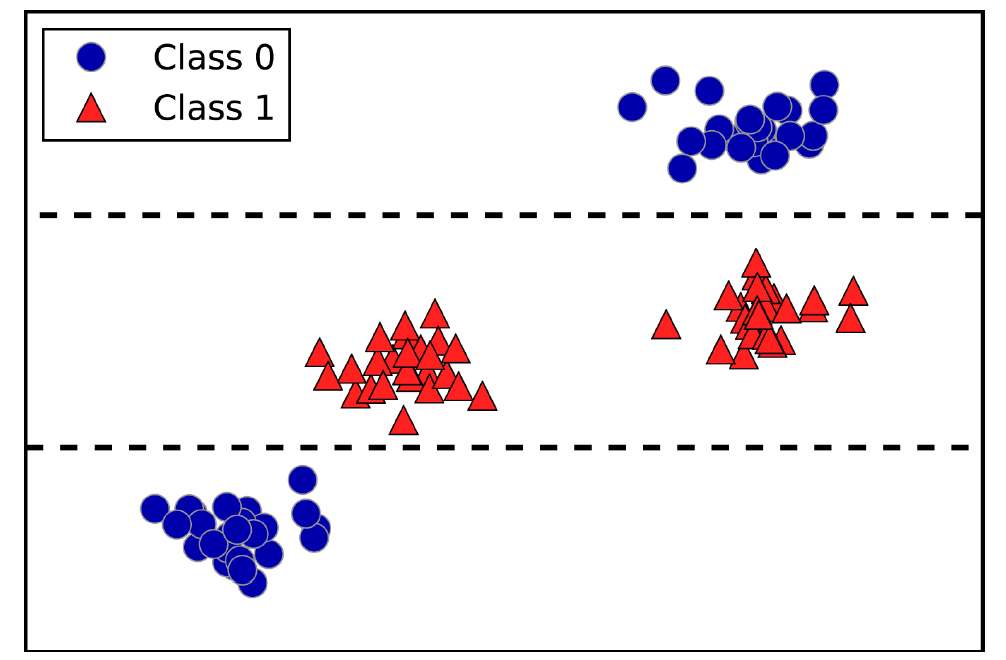

In [14]:
# En el ejemplo anterior el atributo x[1] se divide 2 veces, una en cada etapa; mientras
# que el atributo x[0] es irrelevante

## (4) Fortalezas y debilidades de los árboles de decisión

In [15]:
#  Fortalezas:
# (i) El algoritmo es invariante a la escala de los atributos
# no importa si los atributos son discretos o continuos, ni si son de diversas magnitudes.
# por lo que no requiren de un pre-procesamiento de los datos: normalización, estandarización
# (i) Permiten cierta interpretación sobre el esquema de clasificación gracias 
# a la construcción del árbol y al cálculo de importancia relativa de los atributos.

In [16]:
# Debilidad: 
# (i) Existen Métodos para abatir overfitting: Los parámetros que cortan el árbol 
# son críticos para los resultados:max_depth (máxima profundidad), max_leaf_nodes 
# (máximo número de hojas), or min_samples_leaf (número mínimo de instancias en un nodo);
# no obstante, no evitan del todo el overfitting, por lo que la generalización de sus pronósticos 
# a otras bases similares no siempre es buena
# (ii) Dividen al espacio de atributos con líneas rectas perpendiculares a los ejes; 
# no son buenos para establecer hiperplanos diagonales 

## Por ejemplo 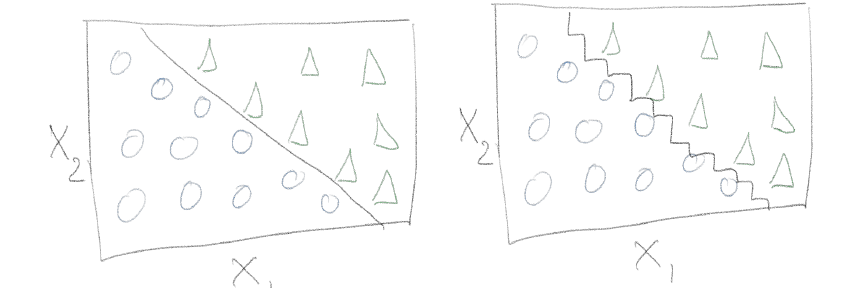

## (5) Matemáticas de ML 

In [17]:
# Si están interesados en la mátemáticas de los algoritmos de ML consultar el libro
# "The Elements of Statistical Learning" por Trevor Hastie, Robert Tibshirani, y Jerome
# Friedman, Editorial Springer.  Consultar página: https://hastie.su.domains/ElemStatLearn/

# (6) Regresiones de decisión

In [18]:
# También se pueden usar los árboles de decisión para pronósticos puntuales (regresiones)

Text(0, 0.5, 'Price in $/Mbyte')

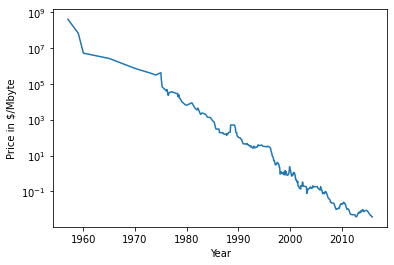

In [11]:
# Importamos la base de datos que previamente subimos al dashboard de jupiter
import pandas as pd
ram_prices = pd.read_csv('ram_price.csv', sep=',')    # Producto chip de memoria
plt.semilogy(ram_prices.date, ram_prices.price)     # Eje de la y es escala logarítmica
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [12]:
# Vamos a comparar predicciones con dos modelos de regresión: árbol y lineal
from sklearn.tree import DecisionTreeRegressor         # Importamos el árbol para regresiones
from sklearn.linear_model import LinearRegression      # Importamos el módulo de regresión lineal
import numpy as np
# Usamos datos históricos para pronosticar después de 2000
data_train = ram_prices[ram_prices.date < 2000]        # Dividimos la muestra
data_test = ram_prices[ram_prices.date >= 2000]
# Predecimos los precios a partir de los años
X_train = np.array(data_train.date)   # Hacemos un arreglo con el atributo (vector)
X_train = X_train.reshape(-1, 1)      # Establezco un arreglo de 1-d vertical
# Usamos una transformacón logarítmica para obtener una mejor predicción con el modelo lineal.
# Este proceso no importa en el caso del árbol
y_train = np.log(data_train.price)    # Los precios son las etiqueta
tree = DecisionTreeRegressor().fit(X_train, y_train)   # Hacemos ajuste con modelo del árbol
linear_reg = LinearRegression().fit(X_train, y_train)  # Hacemos ajuste con regresión
# Predecimos todos los datos de la muestra (incluye aprendizaje y prueba)
X_all = np.array(ram_prices.date)
X_all = X_all.reshape(-1, 1)
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# Ponemos la escala original de los precios
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

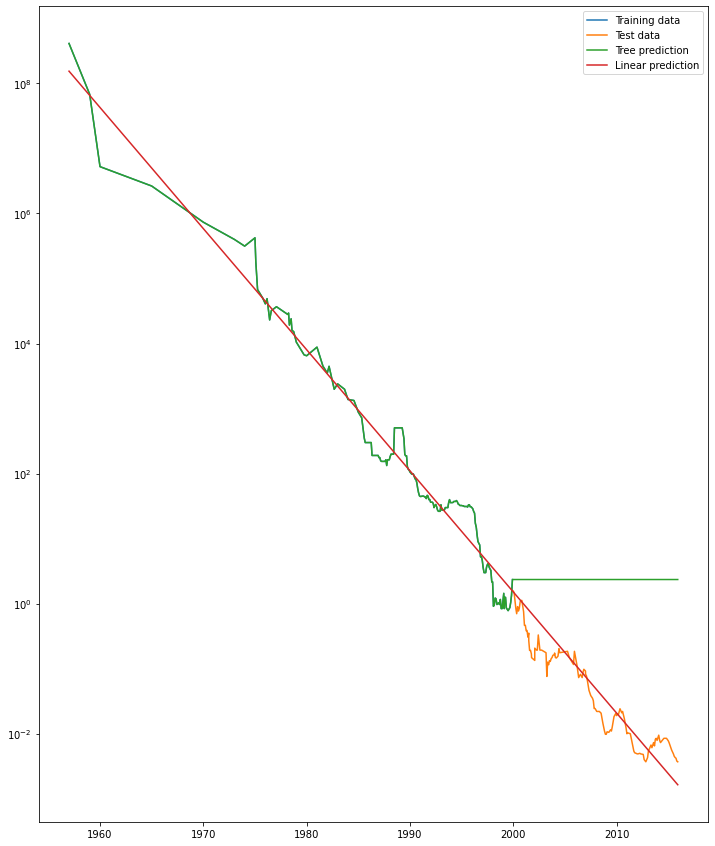

In [14]:
# realizamos las gráficas, eje de precios en escala logarítmica
plt.figure(figsize=(12,15))
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.show()
# Notar que la predicción en instancias de aprendizaje es excelente con el árbol de regresión
# Pero con el conjunto de prueba, la predicción equivale al último precio.
# Moraleja, el método es conveniente para interpolar (es decir hacer pronósticos dentro del
# rango de las Xs (años), pero no para extrapolar (años fuera de la muestra)
# En este último caso es mejor el modelo de regresión lineal